Import Libraries

In [53]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sb
import IPython
import tensorflow.keras.layers as L
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import pickle

Import Directories

In [3]:
cremaDir = "./Data Sets/Speech Recognition/Crema"
ravdessDir = "./Data Sets/Speech Recognition/Ravdess"
saveeDir = "./Data Sets/Speech Recognition/Savee"
tessDir = "./Data Sets/Speech Recognition/Tess"

Crema Dataset Analysis

In [4]:
crema = []
for wav in os.listdir(cremaDir):
  emotion = wav.partition(".wav")[0].split('_')
  if emotion[2] == 'SAD':
    crema.append(('sad', cremaDir + '/' + wav))
  elif emotion[2] == 'ANG':
    crema.append(('angry', cremaDir + '/' + wav))
  elif emotion[2] == 'DIS':
    crema.append(('disgust', cremaDir + '/' + wav))
  elif emotion[2] == 'FEA':
    crema.append(('fear', cremaDir + '/' + wav))
  elif emotion[2] == 'HAP':
    crema.append(('happy', cremaDir + '/' + wav))
  elif emotion[2] == 'NEU':
    crema.append(('neutral', cremaDir + '/' + wav))
  else:
    crema.append(('unknown', cremaDir + '/' + wav))
  
cremaDf = pd.DataFrame.from_dict(crema)
cremaDf.rename(columns={0:'Emotion', 1:'File_path'}, inplace=True)
print(cremaDf.head())
print(cremaDf['Emotion'].unique())

   Emotion                                          File_path
0    angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
1  disgust  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
2     fear  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
3    happy  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
4  neutral  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']


Ravdess Dataset Analysis

In [5]:
ravdess=[]
for dictry in os.listdir(ravdessDir):
    actors = os.listdir(os.path.join(ravdessDir, dictry))
    for wav in actors:
        emotion = wav.partition('.wav')[0].split('-')
        emotionNum = int(emotion[2])
        ravdess.append((emotionNum, os.path.join(ravdessDir, dictry, wav)))
ravdessDf = pd.DataFrame.from_dict(ravdess)
ravdessDf.rename(columns={0:'Emotion', 1:'File_path'}, inplace=True)
ravdessDf['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print(ravdessDf.head())
print(ravdessDf['Emotion'].unique())

IndexError: list index out of range

Savee Dataset Analysis

In [6]:
savee=[]
for wav in os.listdir(saveeDir):
    emo = wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]', '')
    emotion = re.split(r'[0-9]', emo)[0]
    if emotion == 'a':
        savee.append(('angry', saveeDir + '/' + wav))
    elif emotion == 'd':
        savee.append(('disgust', saveeDir + '/' + wav))
    elif emotion == 'f':
        savee.append(('fear', saveeDir + '/' + wav))
    elif emotion == 'h':
        savee.append(('happy', saveeDir + '/' + wav))
    elif emotion == 'n':
        savee.append(('neutral', saveeDir + '/' + wav))
    elif emotion == 'sa':
        savee.append(('sad', saveeDir + '/' + wav))
    elif emotion == 'su':
        savee.append(('surprise', saveeDir + '/' + wav))
saveeDf=pd.DataFrame.from_dict(savee)
saveeDf.rename(columns={0:'Emotion', 1:'File_path'}, inplace=True)
print(saveeDf.head())
print(saveeDf['Emotion'].unique())

  Emotion                                          File_path
0   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
1   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
2   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
3   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
4   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


Tess Dataset Analysis

In [7]:
tess = []
for dictry in os.listdir(tessDir):
    for wav in os.listdir(os.path.join(tessDir, dictry)):
        emotion = wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise', os.path.join(tessDir, dictry, wav)))
        else:
            tess.append((emotion[2], os.path.join(tessDir, dictry, wav)))
tessDf=pd.DataFrame.from_dict(tess)
tessDf.rename(columns={0:'Emotion', 1:'File_path'}, inplace=True)
print(tessDf.head())
print(tessDf['Emotion'].unique())

  Emotion                                          File_path
0   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
1   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
2   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
3   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
4   angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
['angry' 'disgust' 'fear' 'happy' 'neutral' 'surprise' 'sad']


In [10]:
# mainDf = pd.concat([cremaDf, ravdessDf, saveeDf, tessDf], axis=0)
mainDf = pd.concat([cremaDf, saveeDf, tessDf], axis=0)
print(mainDf.shape)
print(mainDf.head(15))
print(mainDf.tail(15))

(10722, 2)
    Emotion                                          File_path
0     angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
1   disgust  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
2      fear  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
3     happy  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
4   neutral  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
5       sad  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
6     angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
7     angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
8     angry  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
9   disgust  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
10  disgust  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
11  disgust  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
12     fear  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
13     fear  C:\Study Stuff\AVV\SEM 5\Machine Learning\Lab\...
14     fear  C:\Study Stuff\AVV\SEM 5\Machin

Visualize Data

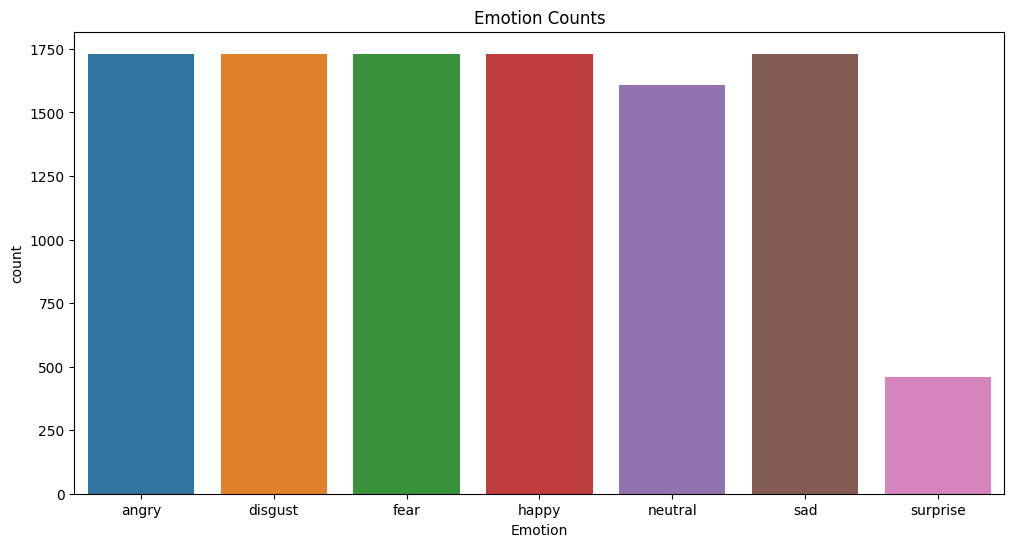

In [11]:
plt.figure(figsize=(12, 6))
plt.title('Emotion Counts')
emotionPlot = sb.countplot(x='Emotion', data=mainDf)
plt.show()

In [12]:
emotionNames = mainDf['Emotion'].unique()
colors={'disgust':'green', 'happy':'#e0e004', 'sad':'blue', 'neutral':'grey', 'fear':'#7f0fbf', 'angry':'red', 'surprise':'#b500b2'}

def wavePlot(data, sr, emotion, color):
    plt.figure(figsize=(12, 5))
    plt.title(f'{emotion} emotuon for waveplt', size=17)
    librosa.display.waveshow(y=data, sr=sr, color=color)

def spectrogram(data, sr, emotion):
    audio = librosa.stft(data)
    audioDb = librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12, 5))
    plt.title(f'{emotion} emotuon for spectrogram', size=17)
    librosa.display.specshow(audioDb, sr=sr, x_axis='time', y_axis='hz')

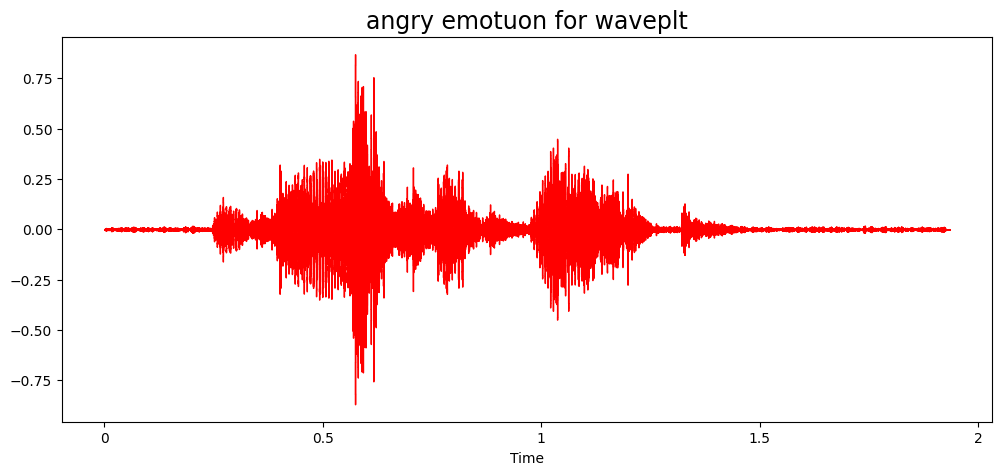

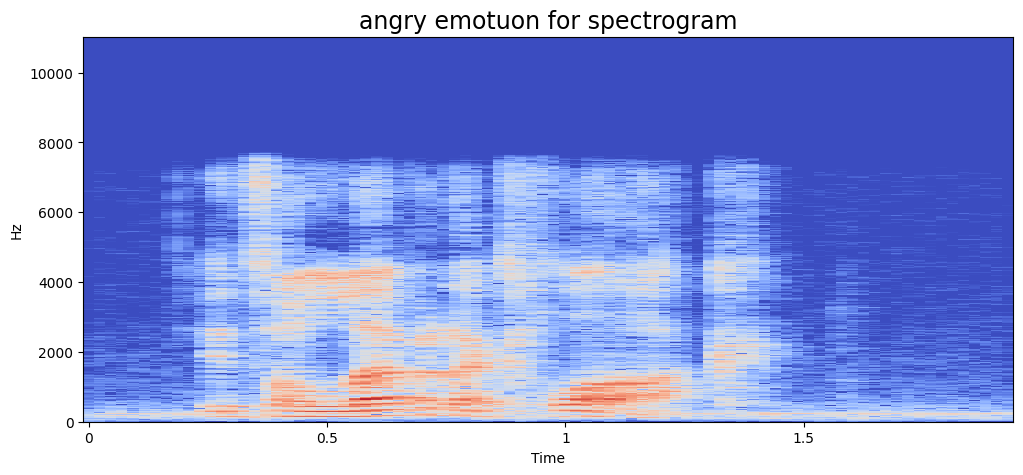

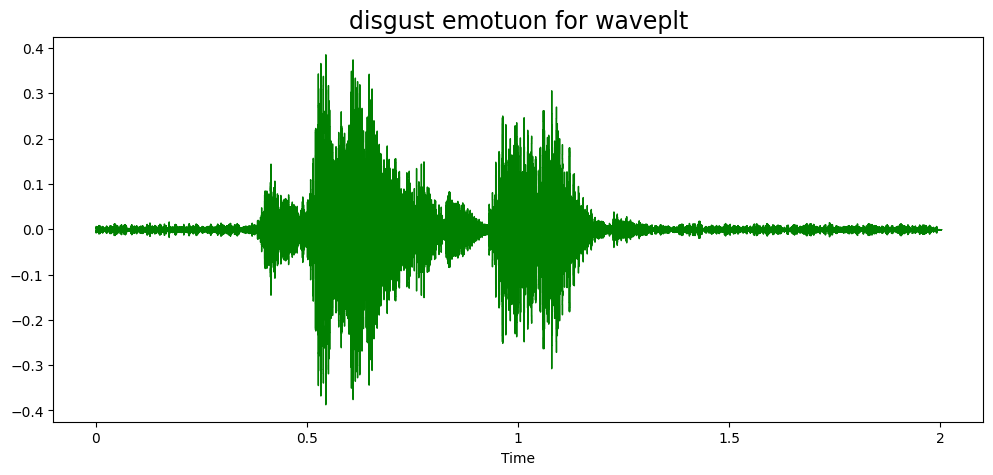

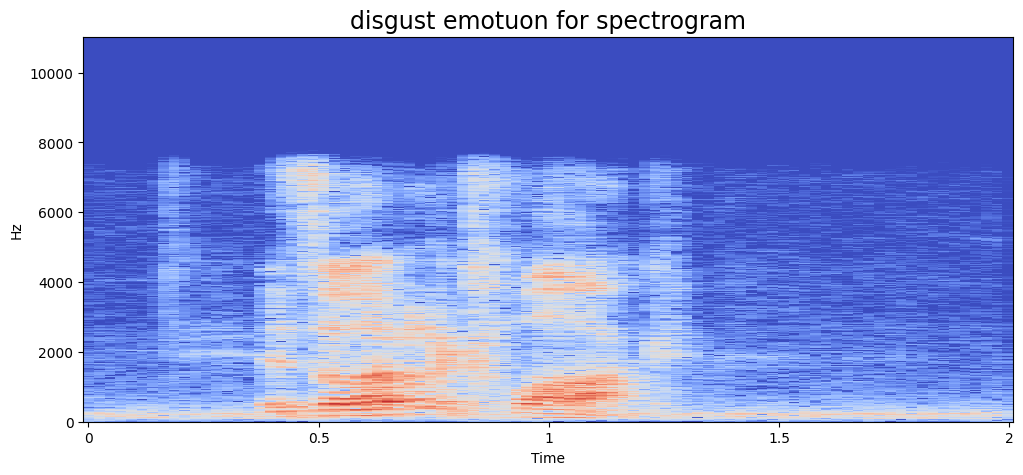

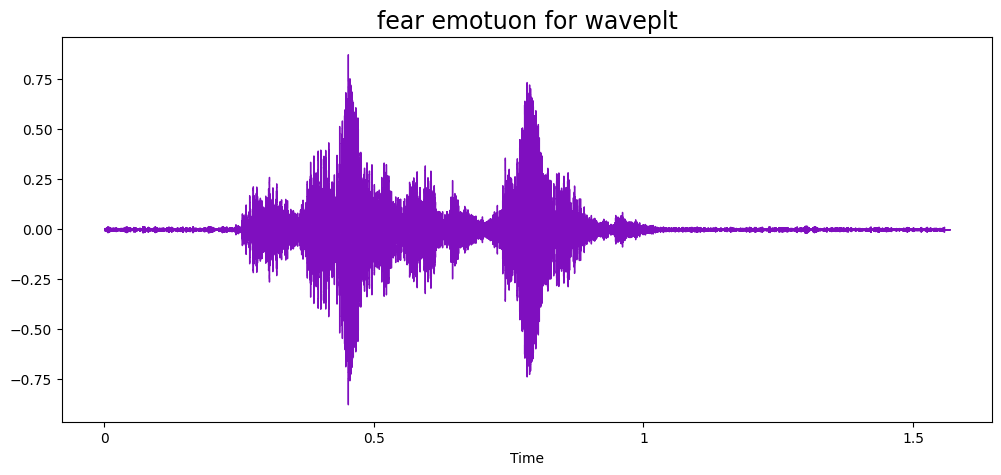

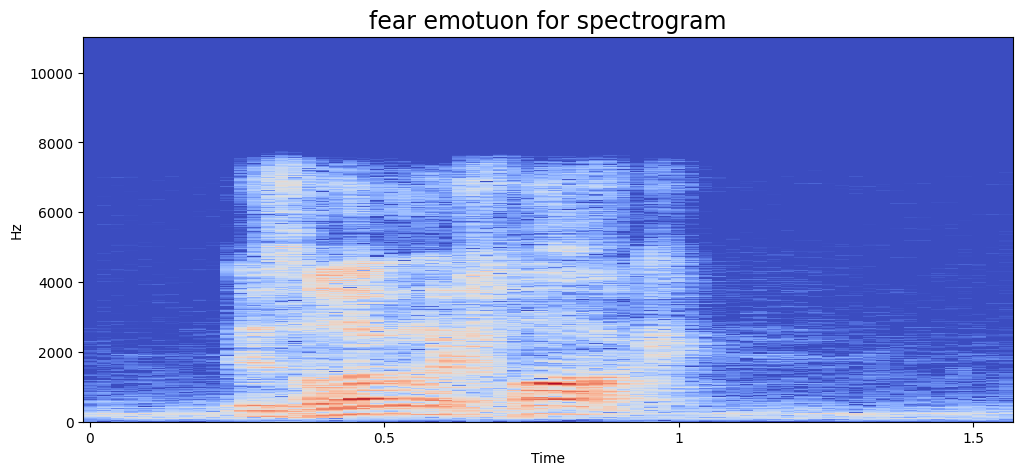

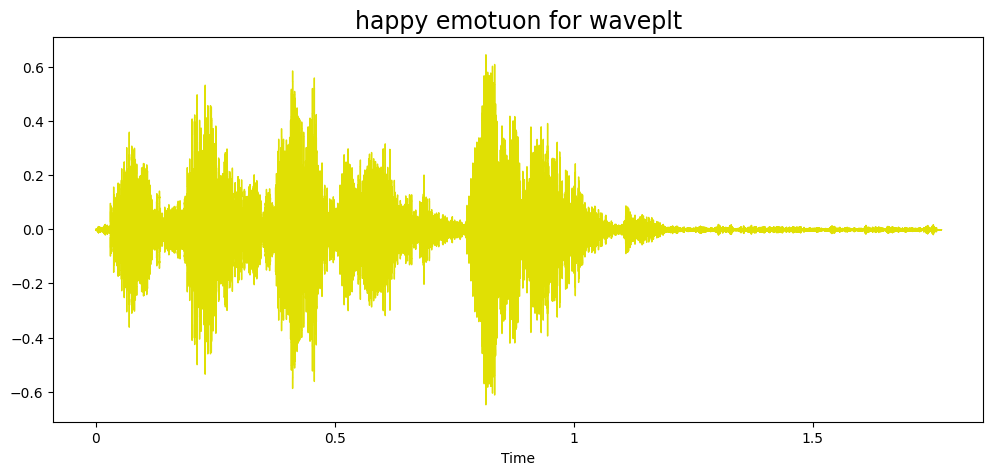

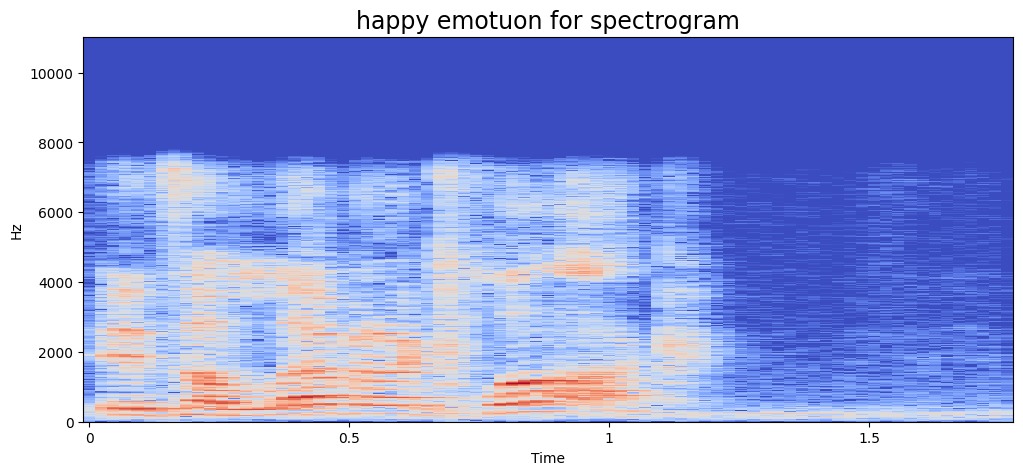

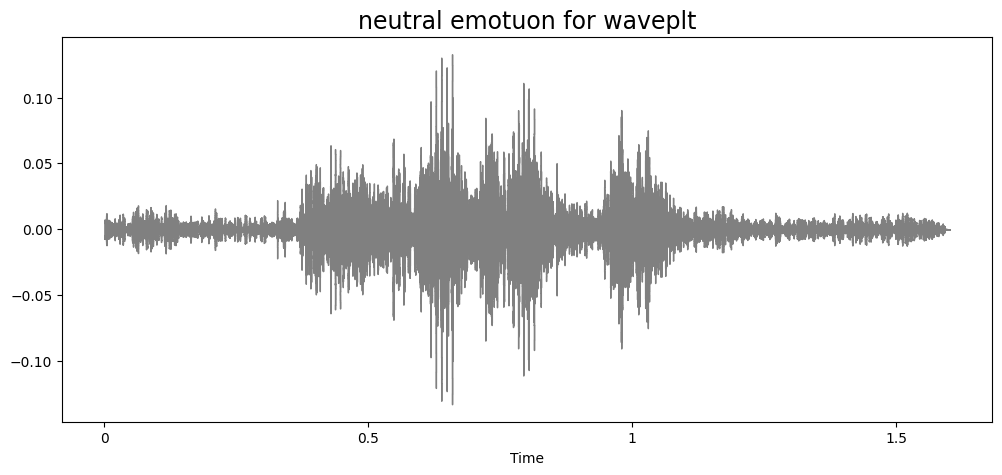

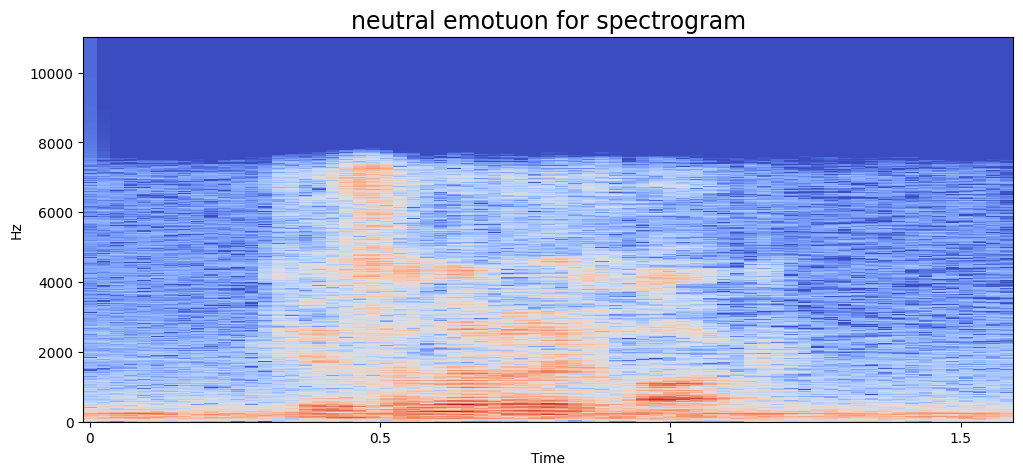

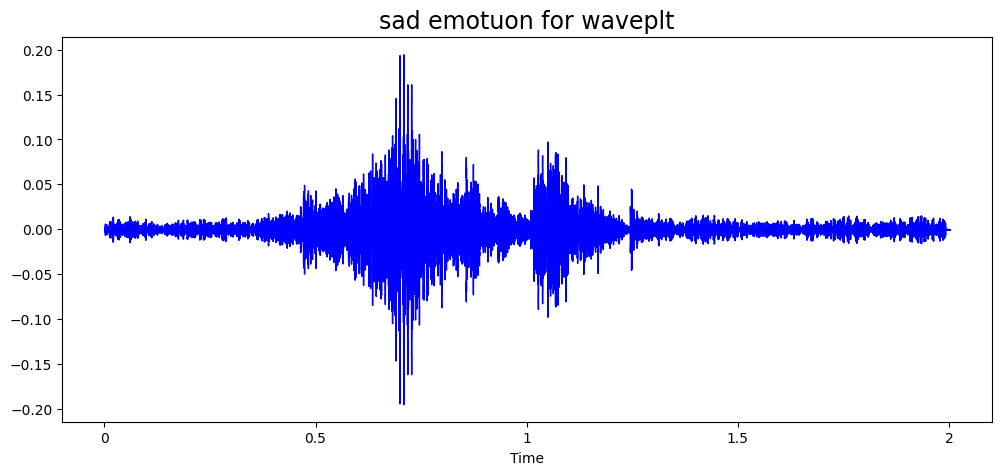

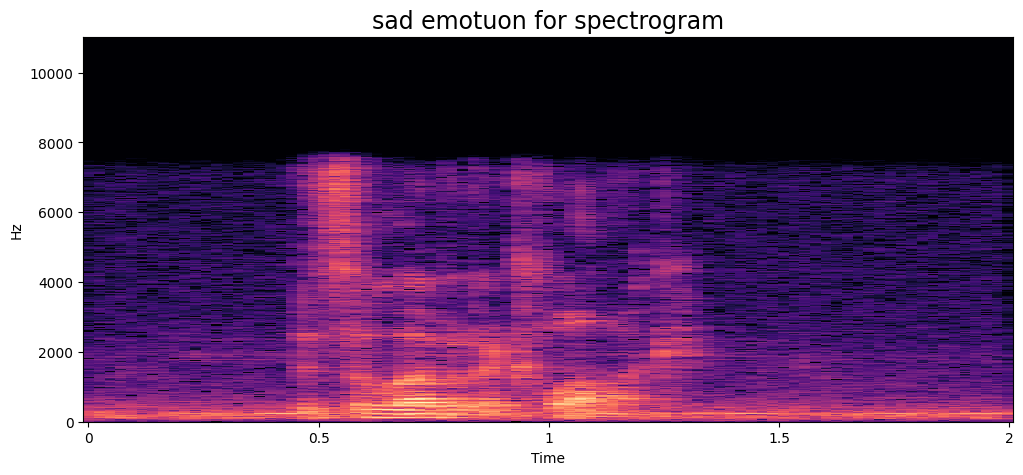

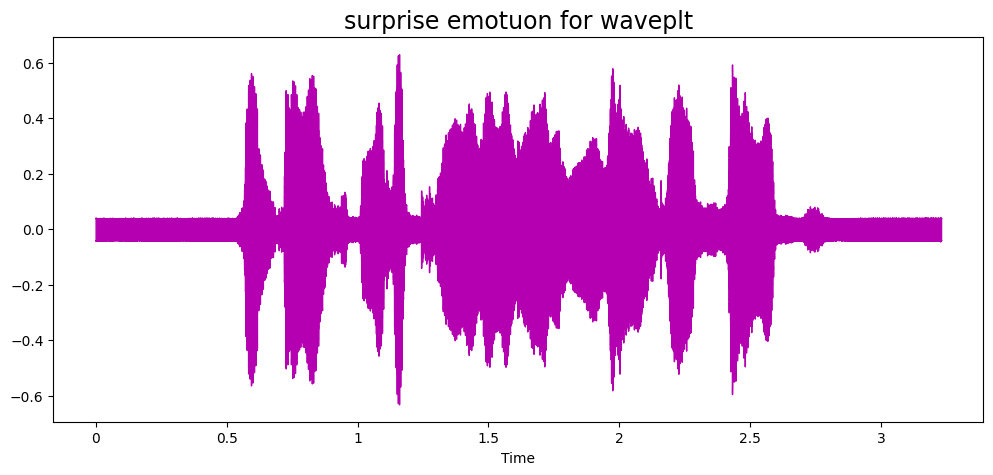

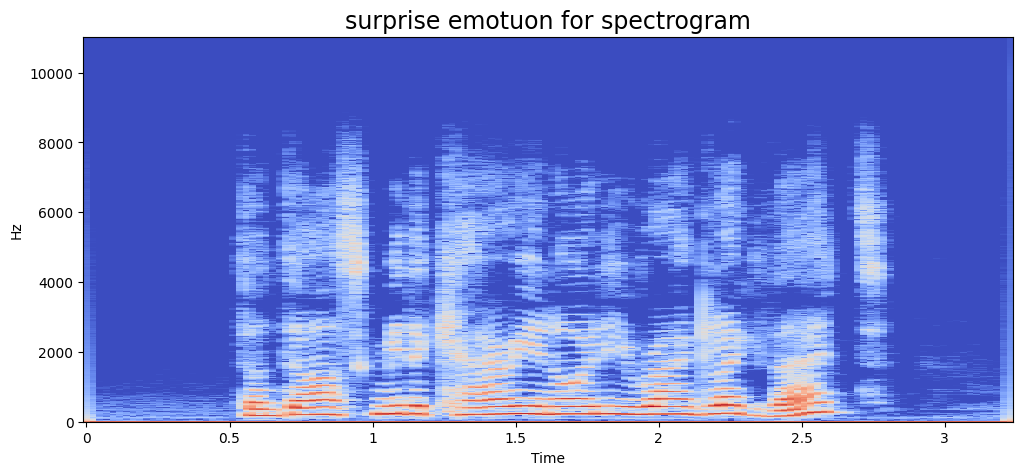

In [13]:
audioPath = []
for emotion in emotionNames:
    path = np.array(mainDf['File_path'][mainDf['Emotion'] == emotion])[1]
    data, sr = librosa.load(path)
    wavePlot(data, sr, emotion, colors[emotion])
    spectrogram(data, sr, emotion)
    audioPath.append(path)

Audio Augmentation

In [14]:
def addNoise(data, random=False, rate=0.035, threshold=0.075):
    if random:
        rate = np.random.random() * threshold
    noise = rate * np.random.uniform() * np.amax(data)
    augmentedData = data + noise * np.random.normal(size=data.shape[0])
    return augmentedData

def shifting(data, rate=1000):
    augmentedData = int(np.random.uniform(low=-5, high=5) * rate)
    augmentedData = np.roll(data, augmentedData)
    return augmentedData

def pitching(data, sr, pitchFact=0.7, random=False):
    if random:
        pitchFact = np.random.random() * pitchFact
    return librosa.effects.pitch_shift(data, sr, pitchFact)

def streching(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

data, sr = librosa.load(audioPath[6])

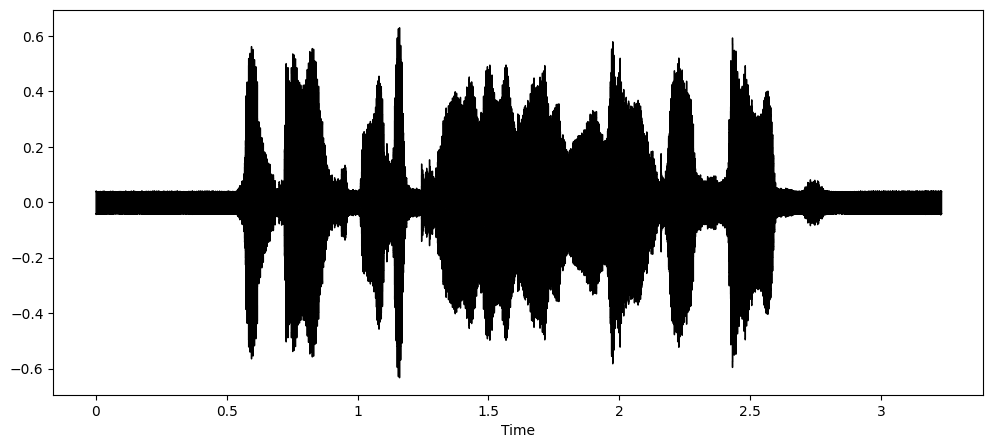

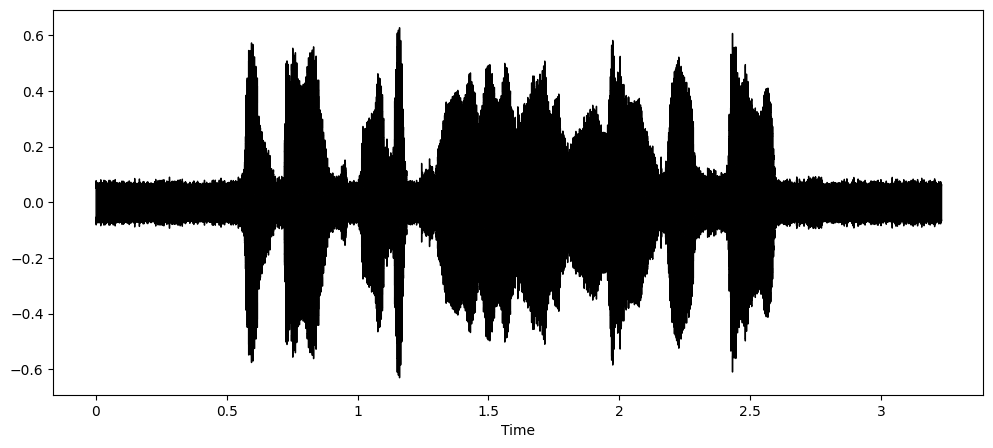

In [15]:
# original audio
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr, color="black")

# noised audio
noisedAudio = addNoise(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(noisedAudio, sr, color="black")
IPython.display.Audio(noisedAudio, rate=sr)

# stretched audio

# shifted audio

# pitched audio

Feature Extraction

In [16]:
def zeroCrossingRate(data, frameLen, hopLen):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frameLen, hop_length=hopLen)
    return np.squeeze(zcr)

def rootMeanSquareEnergy(data, frameLen=2048, hopLen=512):
    rmse = librosa.feature.rms(data, frame_length=frameLen, hop_length=hopLen)
    return np.squeeze(rmse)

def melFrequCepstralCoefficient(data, frameLen=2048, hopLen=512, flatten:bool=True):
    mfcc = librosa.feature.mfcc(data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extractFeatures(data, sr, frameLen=2048, hopLen=512):
    result = np.array([])
    result = np.hstack((result, zeroCrossingRate(data, frameLen, hopLen), rootMeanSquareEnergy(data, frameLen, hopLen), melFrequCepstralCoefficient(data, sr, frameLen, hopLen)))
    return result

def getFeatures(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    aud = extractFeatures(data, sr)
    audio = np.array(aud)

    noisedAudio = addNoise(data, random=True)
    aud2 = extractFeatures(noisedAudio, sr)
    audio = np.vstack((audio, aud2))

    pitchedAudio = pitching(data, sr, random=True)
    aud3 = extractFeatures(noisedAudio, sr)
    audio = np.vstack((audio, aud3))

    pitchedAudio1 = pitching(data, sr, random=True)
    pitchedNoiseAudio = addNoise(pitchedAudio1, random=True)
    aud4 = extractFeatures(pitchedNoiseAudio, sr)
    audio = np.vstack((audio, aud4))
    
    return audio

In [17]:
# processing data
x, y = [], []
for path, emotion, idx in zip(mainDf.File_path, mainDf.Emotion, range(mainDf.File_path.shape[0])):
    features = getFeatures(path)
    if idx % 500 == 0:
        print(f'{idx} audio processed')
    for i in features:
        x.append(i)
        y.append(emotion)
print("Done")

0 audio processed
500 audio processed
1000 audio processed
1500 audio processed
2000 audio processed
2500 audio processed
3000 audio processed
3500 audio processed
4000 audio processed
4500 audio processed
5000 audio processed
5500 audio processed
6000 audio processed
6500 audio processed
7000 audio processed
7500 audio processed
8000 audio processed
8500 audio processed
9000 audio processed
9500 audio processed
10000 audio processed
10500 audio processed
Done


In [18]:
# creating csv file for processed data
processedDataPath = './processedData.csv'
extract = pd.DataFrame(x)
extract['Emotion'] = y
extract.to_csv(processedDataPath, index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.027344,0.057617,0.104004,0.136230,0.136230,0.129883,0.100586,0.070801,0.069336,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.037109,0.076172,0.121582,0.151855,0.144043,0.128906,0.099609,0.070801,0.074219,0.080078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.037109,0.076172,0.121582,0.151855,0.144043,0.128906,0.099609,0.070801,0.074219,0.080078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.166504,0.276367,0.383301,0.386230,0.341797,0.274414,0.208008,0.201660,0.203125,0.207031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041504,0.059082,0.070312,0.061035,0.072754,0.118164,0.134766,0.137695,0.123047,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,0.043457,0.061035,0.072266,0.063965,0.076660,0.124023,0.140625,0.142578,0.129883,0.078125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,0.043457,0.061035,0.072266,0.063965,0.076660,0.124023,0.140625,0.142578,0.129883,0.078125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
7,0.042480,0.059570,0.072266,0.067383,0.088867,0.115723,0.127441,0.126465,0.111328,0.086426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
8,0.052734,0.069336,0.086426,0.068848,0.073730,0.072754,0.075684,0.075684,0.072266,0.085938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
9,0.052734,0.069336,0.086426,0.066895,0.072754,0.071777,0.075684,0.077637,0.074219,0.086914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear


Working On Features

In [19]:
df = pd.read_csv(processedDataPath)
df.shape

(42888, 2377)

In [20]:
df = df.fillna(0)
print(df.isna().any())
print(df.shape)
print(df.head(10))

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool
(42888, 2377)
          0         1         2         3         4         5         6  \
0  0.027344  0.057617  0.104004  0.136230  0.136230  0.129883  0.100586   
1  0.037109  0.076172  0.121582  0.151855  0.144043  0.128906  0.099609   
2  0.037109  0.076172  0.121582  0.151855  0.144043  0.128906  0.099609   
3  0.166504  0.276367  0.383301  0.386230  0.341797  0.274414  0.208008   
4  0.041504  0.059082  0.070312  0.061035  0.072754  0.118164  0.134766   
5  0.043457  0.061035  0.072266  0.063965  0.076660  0.124023  0.140625   
6  0.043457  0.061035  0.072266  0.063965  0.076660  0.124023  0.140625   
7  0.042480  0.059570  0.072266  0.067383  0.088867  0.115723  0.127441   
8  0.052734  0.069336  0.086426  0.068848  0.073730  0.072754  0.075684   
9  0.052734  0.069336  

Process Analyzed Data For Training

In [21]:
x = df.drop(labels='Emotion', axis=1)
y = df['Emotion']
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y))
print(lb.classes_, "\n", y)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise'] 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Train-Test Split

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=42, test_size=0.2, shuffle=True)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, random_state=42, test_size=0.1, shuffle=True)
print(xTrain.shape, xTest.shape, xVal.shape, yTrain.shape, yTest.shape, yVal.shape)

(34310, 2376) (8578, 2376) (34310, 7) (8578, 7)
(30879, 2376) (8578, 2376) (3431, 2376) (30879, 7) (8578, 7) (3431, 7)


In [23]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)
xVal = scaler.transform(xVal)
print(xTrain.shape, xTest.shape, xVal.shape, yTrain.shape, yTrain.shape, yVal.shape)

(30879, 2376) (8578, 2376) (3431, 2376) (30879, 7) (30879, 7) (3431, 7)


In [24]:
xTrain = np.expand_dims(xTrain, axis=2)
xVal = np.expand_dims(xVal, axis=2)
xTest = np.expand_dims(xTest, axis=2)
print(xTrain.shape, xTest.shape, xVal.shape)

(30879, 2376, 1) (8578, 2376, 1) (3431, 2376, 1)


In [26]:
# training tuning
earlyStop = EarlyStopping(monitor='val_acc', mode='auto', patience=5, restore_best_weights=True)
lrReduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [27]:
epoch = 10
batchSize = 64

Training

In [28]:
model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding="same", activation='relu', input_shape=(xTrain.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=5, strides=1, padding='same'),
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2376, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2376, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1188, 512)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1188, 256)         6

In [29]:
history = model.fit(xTrain, yTrain, epochs = epoch, validation_data=(xVal, yVal), batch_size=batchSize, callbacks=[earlyStop, lrReduction])

Epoch 1/10
483/483 [==============================] - 3292s 7s/step - loss: 1.2958 - accuracy: 0.5114 - val_loss: 1.3989 - val_accuracy: 0.4497
Epoch 2/10
483/483 [==============================] - 3278s 7s/step - loss: 0.9682 - accuracy: 0.6296 - val_loss: 0.9420 - val_accuracy: 0.6409
Epoch 3/10
483/483 [==============================] - 3270s 7s/step - loss: 0.7915 - accuracy: 0.7013 - val_loss: 0.8538 - val_accuracy: 0.6721
Epoch 4/10
483/483 [==============================] - 3264s 7s/step - loss: 0.5811 - accuracy: 0.7854 - val_loss: 0.7669 - val_accuracy: 0.7182
Epoch 5/10
483/483 [==============================] - 3256s 7s/step - loss: 0.3774 - accuracy: 0.8675 - val_loss: 0.5364 - val_accuracy: 0.8143
Epoch 6/10
483/483 [==============================] - 3265s 7s/step - loss: 0.2236 - accuracy: 0.9246 - val_loss: 0.3522 - val_accuracy: 0.8753
Epoch 7/10
483/483 [==============================] - 3275s 7s/step - loss: 0.1027 - accuracy: 0.9698 - val_loss: 0.4062 - val_accuracy:

Charts

In [ ]:
chart = px.line(history.history, y=['accuracy', 'val_accuracy'], labels={'index':'epoch', 'value':'accuracy'}, title=f'Validation Accuracy Chart')
chart.show()

In [ ]:
# loss control
chart = px.line(history.history, y=['loss','val_loss'], labels={'index':'epoch','value':'loss'}, title=f'Validation Loss Chart')
chart.show()

Model Test & Results

In [34]:
prediction = model.predict(xTest)
prediction = np.argmax(prediction, axis=1)
print(prediction)

[5 3 2 ... 1 4 6]


In [35]:
check = np.argmax(yTest, axis=1)
print(check)

[1 3 2 ... 1 4 6]


In [38]:
loss, accuracy = model.evaluate(xTest, yTest, verbose=0)
print("Test Loss : ", loss, "\nTest Accuracy : ", accuracy)

Test Loss :  0.320136159658432 
Test Accuracy :  0.9061552882194519


Save Model

In [41]:
cnnModelFile = './cnnModel.pkl'
cnnModelPkl = open(cnnModelFile, 'wb')
pickle.dump(model, cnnModelPkl)
cnnModelPkl.close()

TypeError: cannot pickle 'weakref' object

In [43]:
model.save("./Model")

INFO:tensorflow:Assets written to: ./Model\assets


In [54]:
save_model(model, "SaveModel.h5")

In [56]:
jsonModel = model.to_json()
with open("SavedModel.json", "w") as jsonFile:
    jsonFile.write(jsonModel)
model.save_weights("SavedJSONModel.h5")

Test Saved Model

In [ ]:
reconstructModel = keras.model.load_model("Model")

loss, accuracy = reconstructModel.evaluate(xTest, yTest, verbose=0)
print("Test Loss : ", loss, "\nTest Accuracy : ", accuracy)

In [55]:
reconstructModel = load_model("SaveModel.h5")
reconstructModel.summary()
loss, accuracy = reconstructModel.evaluate(xTest, yTest, verbose=0)
print("Test Loss : ", loss, "\nTest Accuracy : ", accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2376, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2376, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1188, 512)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1188, 256)         6